In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
 
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/BankChurners.csv")

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
x = pd.DataFrame(data[["Credit_Limit", "Total_Trans_Amt"]])  

In [7]:
x = x.iloc[:200, :]
x.head()

,Credit_Limit,Total_Trans_Amt
0,12691.0,1144
1,8256.0,1291
2,3418.0,1887
3,3313.0,1171
4,4716.0,816


In [8]:
# Standard scalar is applied to the given data set for the numerical columns
x.iloc[:, [0]] = MinMaxScaler().fit_transform(x.iloc[:, [0]])

In [9]:
x.iloc[:, [1]] = MinMaxScaler().fit_transform(x.iloc[:, [1]])

In [10]:
x.head()

,Credit_Limit,Total_Trans_Amt
0,0.340190,0.302463
1,0.206112,0.374877
2,0.059850,0.668473
3,0.056676,0.315764
4,0.099091,0.140887


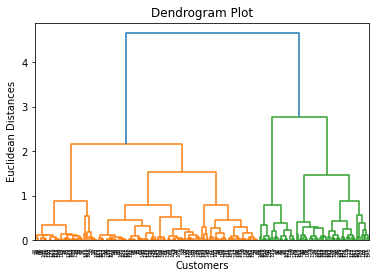

In [11]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()  

In [16]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  

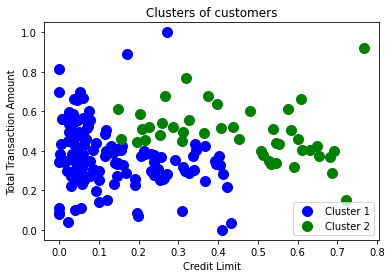

In [ ]:
x = np.array(x)
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.title('Clusters of customers')  
plt.xlabel('Credit Limit')  
plt.ylabel('Total Transaction Amount')  
plt.legend()  
plt.show()  

According to the interpretation of the dendogram, the the optimal number of clusters is 2. The maximum vertical distance that does not cut any horizontal bar is taken into consideration. 

When similar analysis was performed for K-Means, the optimal number of clusters was found to be 9. Less number of clusters were found as optimal in Hierachical Clustering.

K-means is a cluster analysis technique that uses a predetermined number of clusters. It calls a prior knowledge of "K." The goal of hierarchical clustering, sometimes referred to as hierarchical cluster analysis (HCA), is to create a hierarchy of clusters without using a set number of clusters.